Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np

###Task:

1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [ ]:
#loading dataset
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Vizualizations

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
count = (dataset['Balance'] == 0).sum()
print(count ,"Members have zero balance")
count = (dataset['CreditScore'] == 0).sum()
print(count ,"Members salary will be zero")

3617 Members have zero balance
0 Members salary will be zero


In [ ]:
dataset[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
dataset['CreditScore'] = dataset['CreditScore'].replace(0, dataset.CreditScore.mean())    
dataset['Age'] = dataset['Age'].replace(0, dataset.Age.mean())
dataset['Tenure'] = dataset['Tenure'].replace(0, dataset.Tenure.mean())
dataset['Balance'] = dataset['Balance'].replace(0, dataset.Balance.mean())
dataset['NumOfProducts'] = dataset['NumOfProducts'].replace(0, dataset.NumOfProducts.mean())
dataset['EstimatedSalary'] = dataset['EstimatedSalary'].replace(0, dataset.EstimatedSalary.mean())

In [ ]:
dataset[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.219829,104150.835443,1.530200,100090.239881
std,96.653299,10.487806,2.698872,31809.130134,0.581654,57510.492818
min,350.000000,18.000000,1.000000,3768.690000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,76485.889288,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


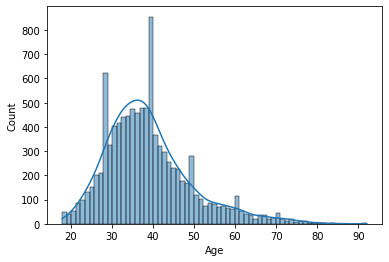

In [ ]:
#univariate analysis of continuous data
sns.histplot(dataset.Age,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



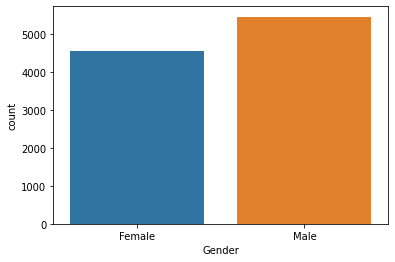

In [ ]:
#univariate analysis of categorical data
sns.countplot(dataset.Gender)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



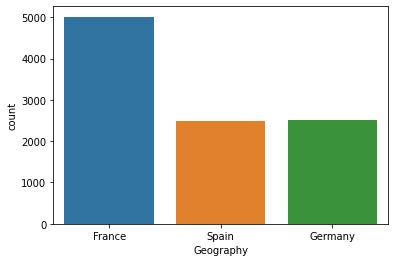

In [ ]:
sns.countplot(dataset.Geography)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



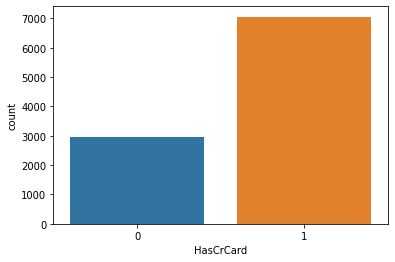

In [ ]:
sns.countplot(dataset.HasCrCard)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



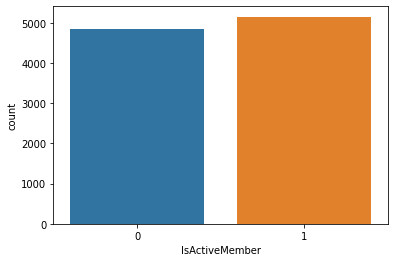

In [ ]:
sns.countplot(dataset.IsActiveMember)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



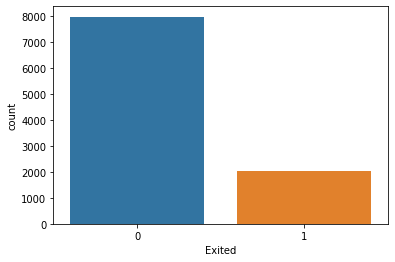

In [ ]:
sns.countplot(dataset.Exited)

Bivariate Analysis

In [ ]:
dataset[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.002105,0.002614,0.012238,-0.001384
Age,-0.003965,1.000000,-0.008777,0.015149,-0.030680,-0.007201
Tenure,0.002105,-0.008777,1.000000,-0.004243,0.002919,0.011389
Balance,0.002614,0.015149,-0.004243,1.000000,-0.216214,0.008366
NumOfProducts,0.012238,-0.030680,0.002919,-0.216214,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.011389,0.008366,0.014204,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



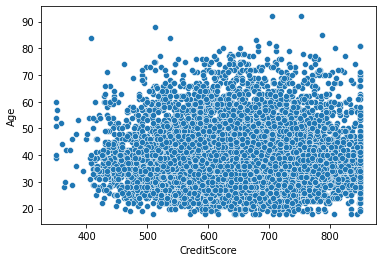

In [ ]:
sns.scatterplot(dataset.CreditScore,dataset.Age)

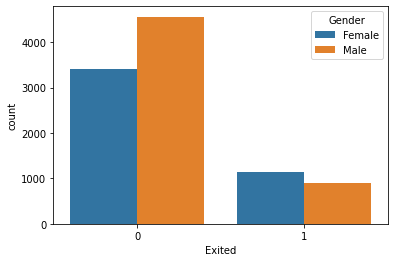

In [ ]:
#categorical vs categorical
sns.countplot(data=dataset,x='Exited',hue='Gender')

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006114   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.013273   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.002105   
Age               0.000783    0.009497    -0.003965  1.000000 -0.008777   
Tenure           -0.006114   -0.013273     0.002105 -0.008777  1.000000   
Balance          -0.008264   -0.012160     0.002614  0.015149 -0.004243   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.002919   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.014676   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028065   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.011389   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.009989   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.008264   

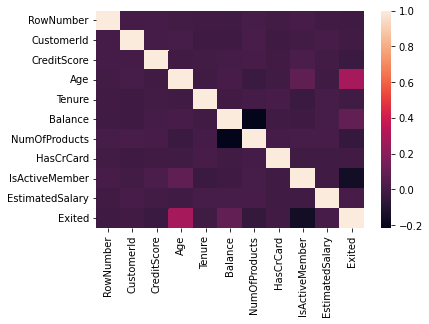

In [ ]:
corrmat=dataset.corr()
print(corrmat)
sns.heatmap(corrmat, square=False).xaxis.tick_bottom()


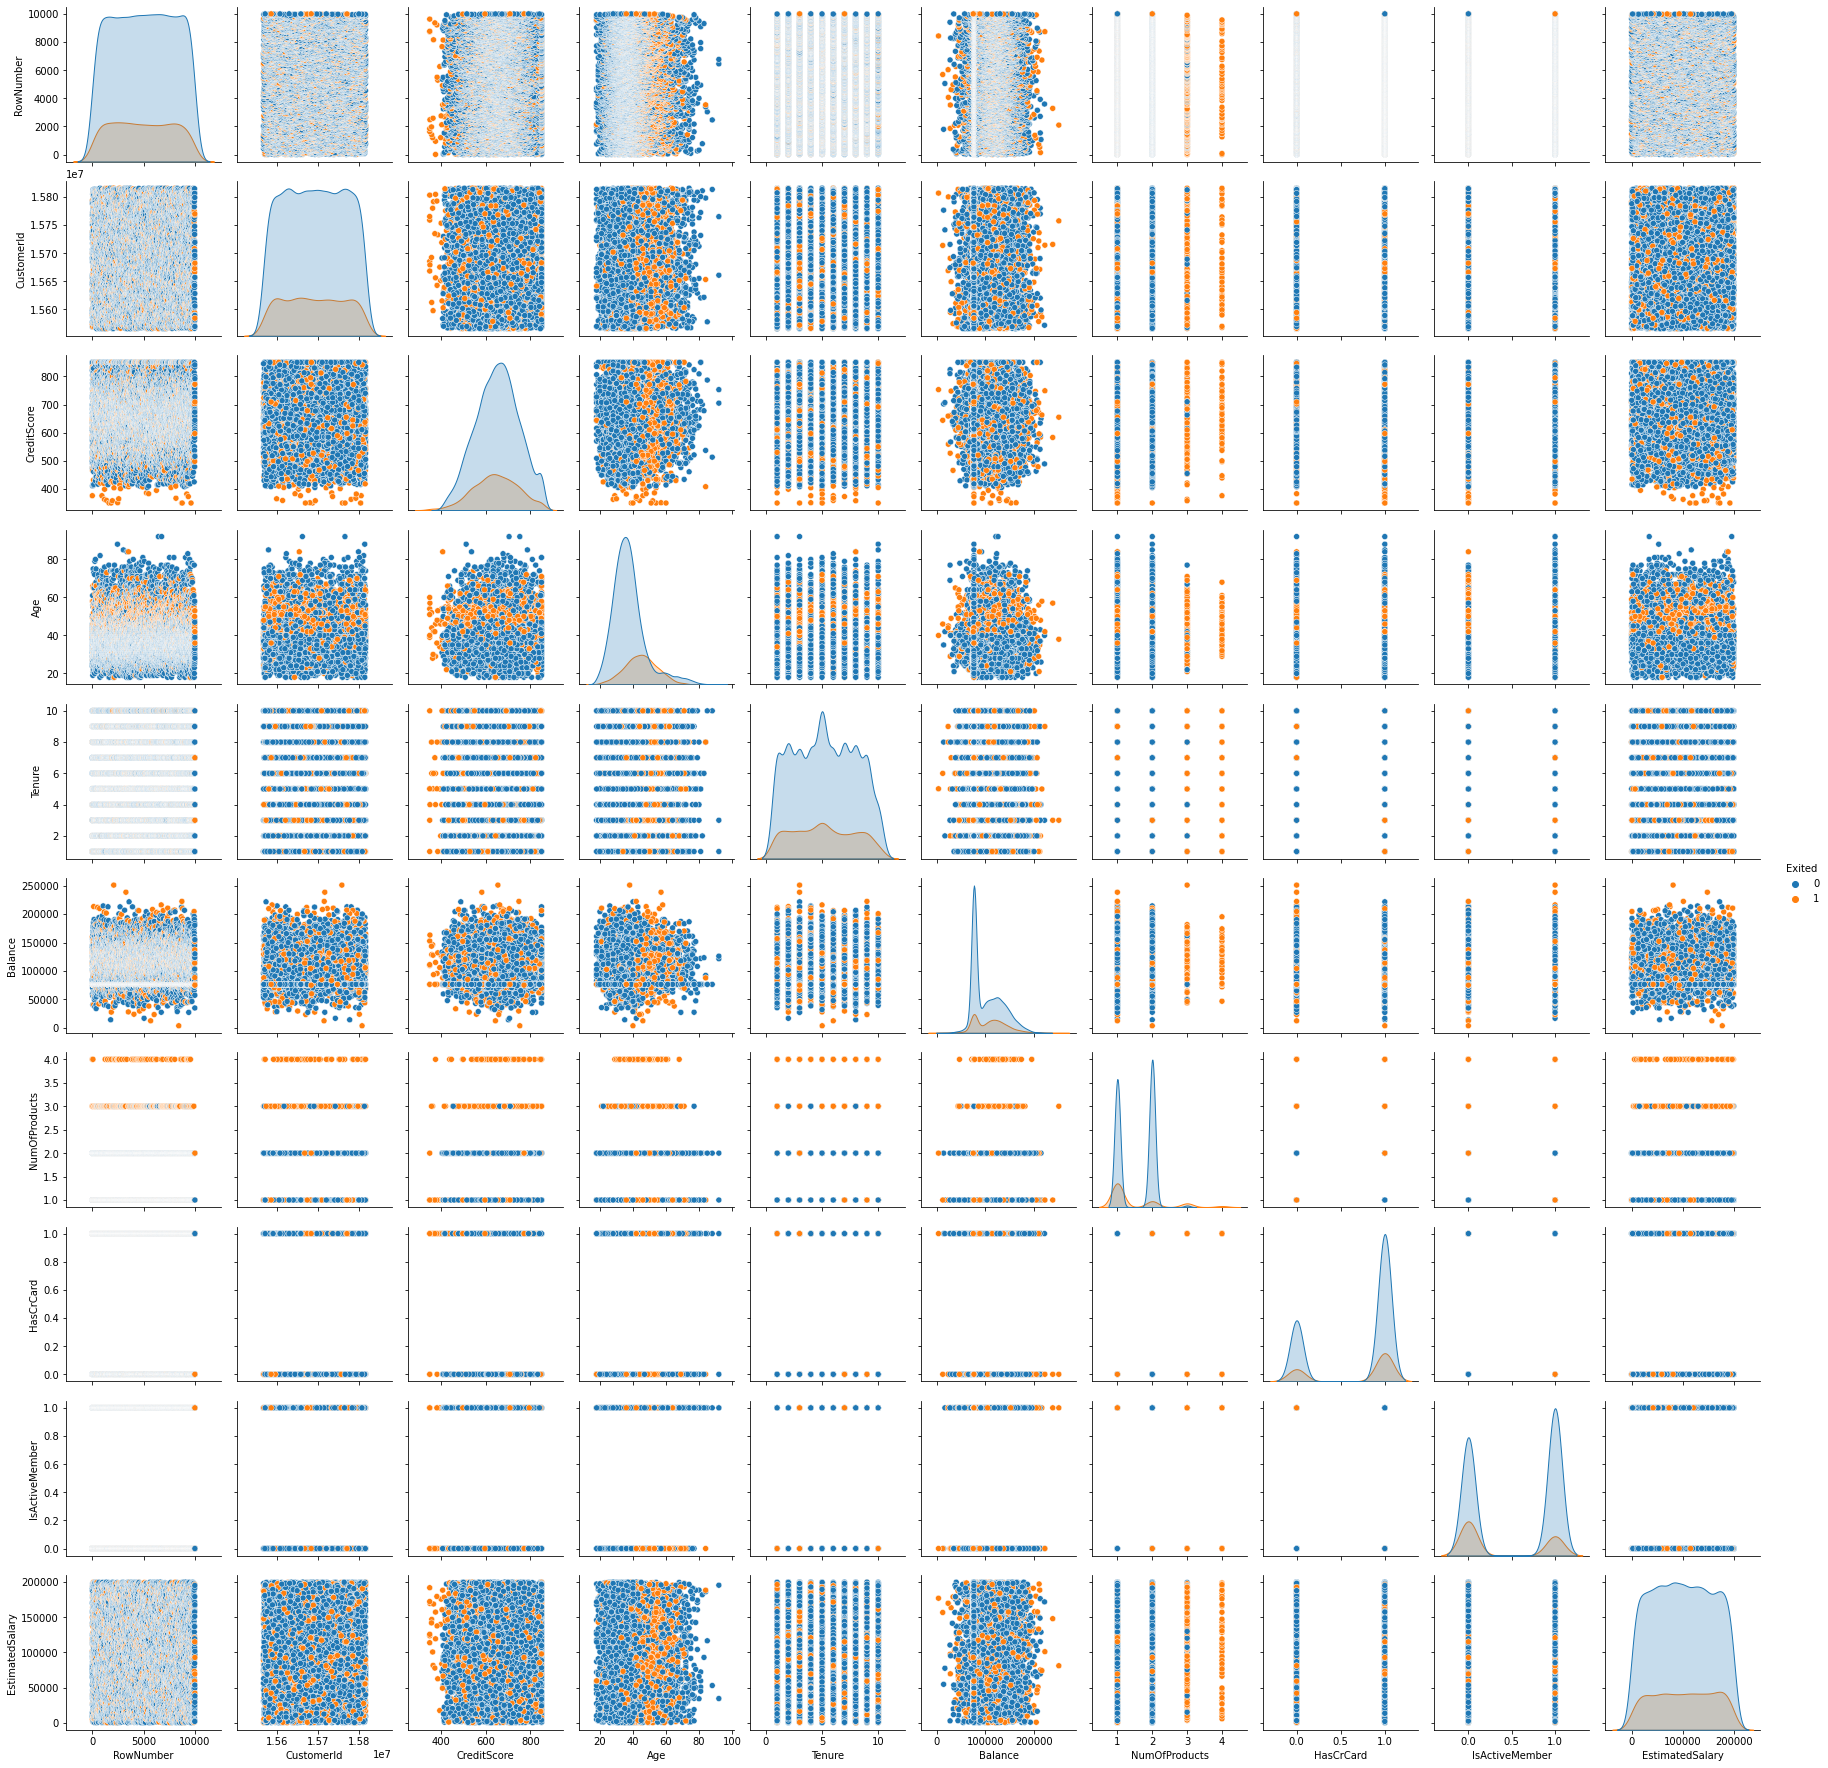

In [ ]:
sns.pairplot(dataset,hue='Exited')

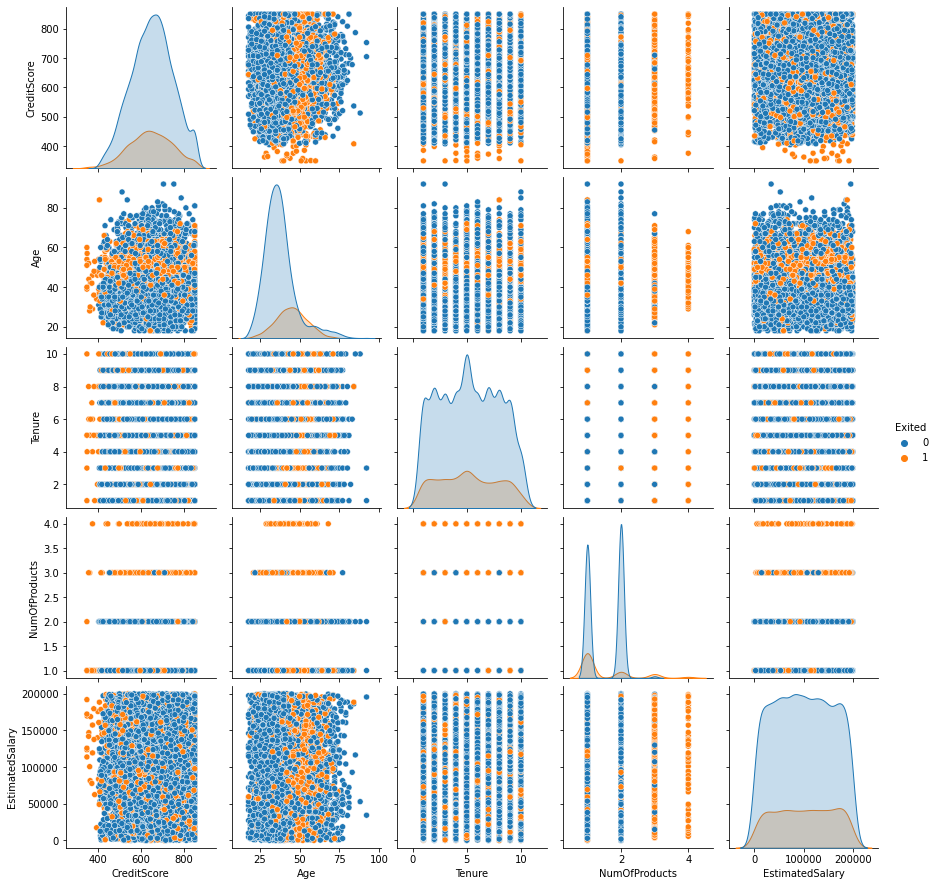

In [ ]:
sns.pairplot(data=dataset[['CreditScore','Age','Tenure','NumOfProducts','EstimatedSalary','Exited']],hue='Exited')

Handling Missing Values

In [ ]:
dataset.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Descriptive Statistics

In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.219829,104150.835443,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.698872,31809.130134,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,1.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,76485.889288,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Finding Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



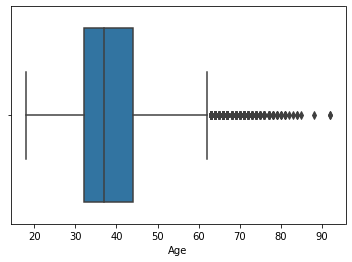

In [ ]:
sns.boxplot(dataset['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



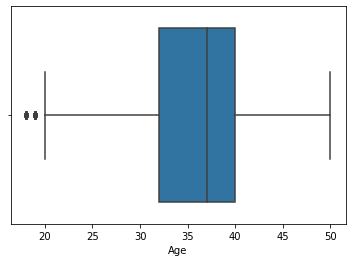

In [ ]:
dataset["Age"]=np.where(dataset["Age"] >50 , dataset["Age"].median(),dataset['Age'])

sns.boxplot(dataset["Age"])
plt.show()

In [ ]:
sorted(dataset)
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
print(IQR)
dataset_cleared_iqr = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Before remving outlier ",dataset.shape)
print(dataset_cleared_iqr)
print("After Removing outliers ",dataset_cleared_iqr.shape)



CreditScore           134.0000
Geography               1.0000
Gender                  1.0000
Age                     8.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64
Before remving outlier  (10000, 11)
      CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
1             608          2       0  41.0       1   83807.86              1   
3             699          0       0  39.0       1       0.00              2   
4             850          2       0  43.0       2  125510.82              1   
6             822          0       1  50.0       7       0.00              2   
8             501          0       1  44.0       4  142051.07              2   
...           ...        ...     ...   ...     ...        ...            ...   
9993          644          0       1  28.0      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



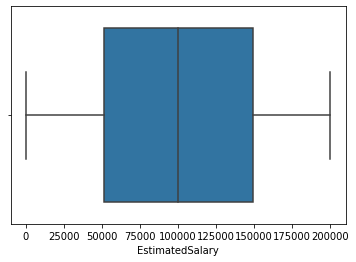

In [ ]:
sns.boxplot(dataset['EstimatedSalary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



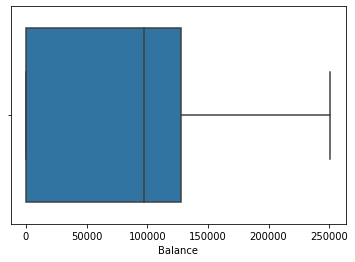

In [ ]:
sns.boxplot(dataset['Balance'])
plt.show()

In [ ]:
import plotly.express as px
fig = px.box(dataset, x="Geography", y = "EstimatedSalary",color = 'Exited'); # Another visualization about salary effect
fig.update_layout(title_text="The country with the mean salary-With Outliers(Exited-Not Exited groups)")
fig.show();

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset['Geography']= le.fit_transform(dataset['Geography'])
dataset['Gender']= le.fit_transform(dataset['Gender'])
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#dataset.drop(['CustomerId','Surname','RowNumber'],inplace=True,axis=1)
y=dataset['Exited']
x=dataset.drop('Exited',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)